In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# data imports
test_df = pd.read_csv('D:/Dokumenty/Komputry/Python/datasets/titanic_test.csv')
train_df = pd.read_csv('D:/Dokumenty/Komputry/Python/datasets/titanic_train.csv')
train_df.head()

# data description: https://www.kaggle.com/competitions/titanic/data
# logistic regression: https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
no_of_obs = len(train_df)
print(f'No of observations: {no_of_obs}')

No of observations: 891


In [4]:
# data preparation - null values (percent of total)
train_df.isnull().sum()/no_of_obs*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

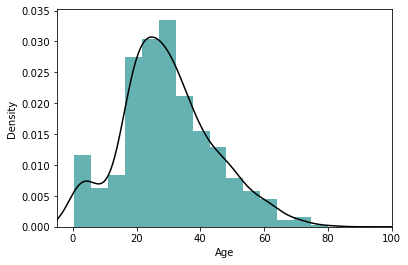

In [5]:
# age - null values
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df['Age'].plot(kind='density', color='black')
ax.set(xlabel='Age')
plt.xlim(-5, 100)

#skewed data, we'll replace nulls with median (instead of mean)
mean_age = train_df['Age'].mean(skipna=True)

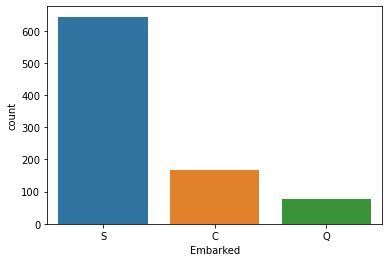

In [6]:
# cabin - null values >70%, we'll omit it from calcs
# embarked - null values - we can replace missing data with the most common embarking city 
sns.countplot(data=train_df, x='Embarked')
most_embarked = train_df['Embarked'].value_counts().idxmax() #idxmax - find label with the highest count

In [7]:
# data pre-preparation
train_data = train_df
train_data['Age'].fillna(mean_age, inplace=True)
train_data['Embarked'].fillna(most_embarked, inplace=True)

In [8]:
# adding additional variables
# we'll add binary column to reflect whether pass traveled alone
train_data['TravelAlone'] = np.where((train_data['SibSp']) + (train_data['Parch']) > 0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

train_data.head()

In [15]:
# create dummy variables
training = pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"]) #https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
# drop other columns
for col in ["Sex_female", "PassengerId", "Name", "Ticket", "Cabin"]:
    training.drop(col, axis=1, inplace=True)
    
final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [14]:
# apply the same changes to test data
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])

for col in ["Sex_female", "PassengerId", "Name", "Ticket", "Cabin"]:
    testing.drop(col, axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


### EDA (copied)

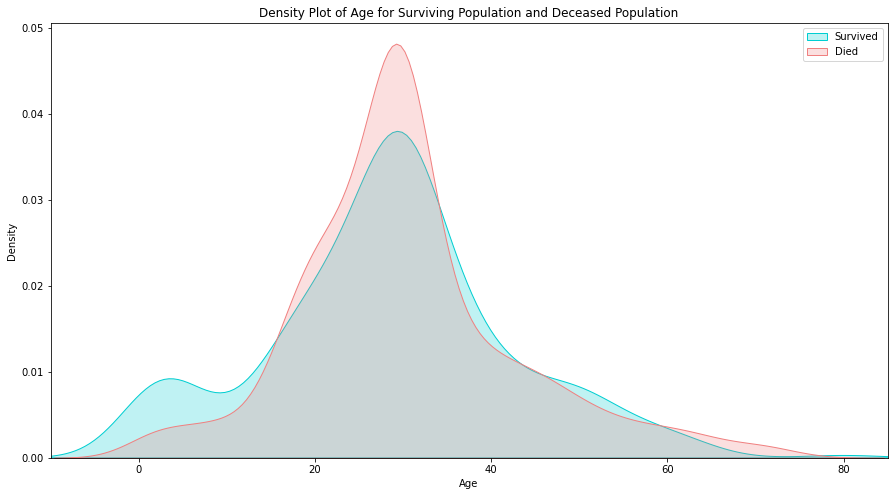

In [19]:
# age
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

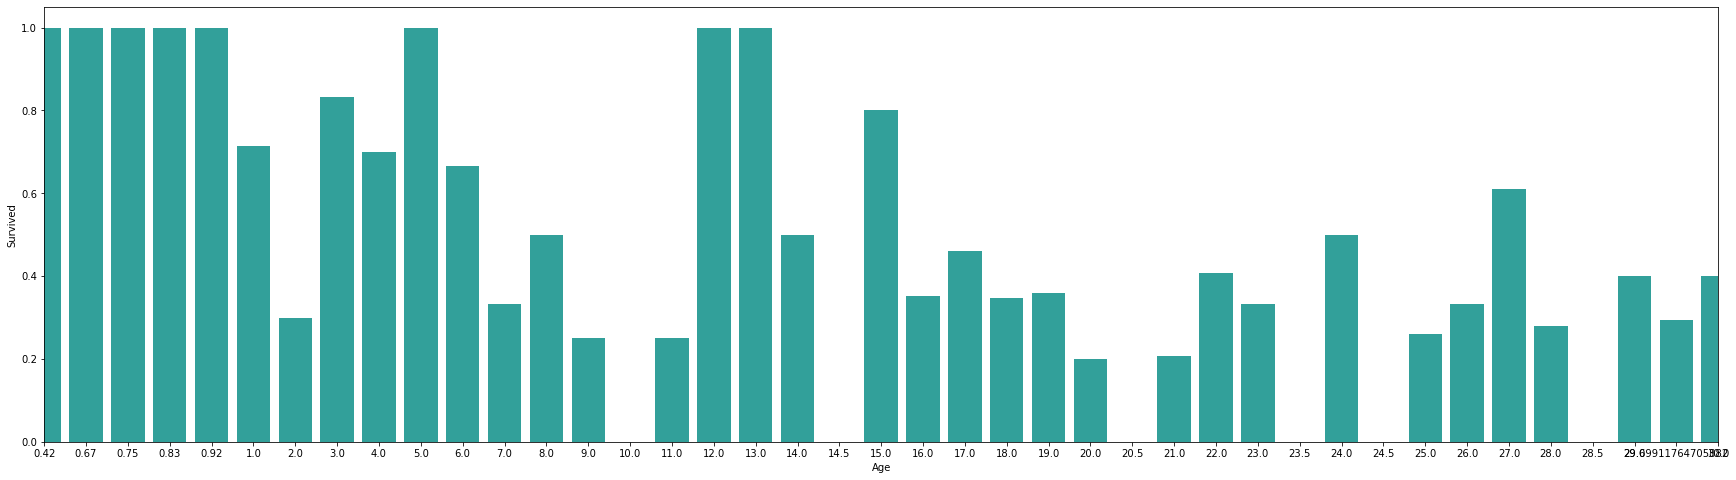

In [25]:
# age ctnd
plt.figure(figsize=(30,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.xlim(0, 40)
plt.show()

In [28]:
# we're adding new feature - minor - because of high survival rate amoung younger passengers
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)
final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

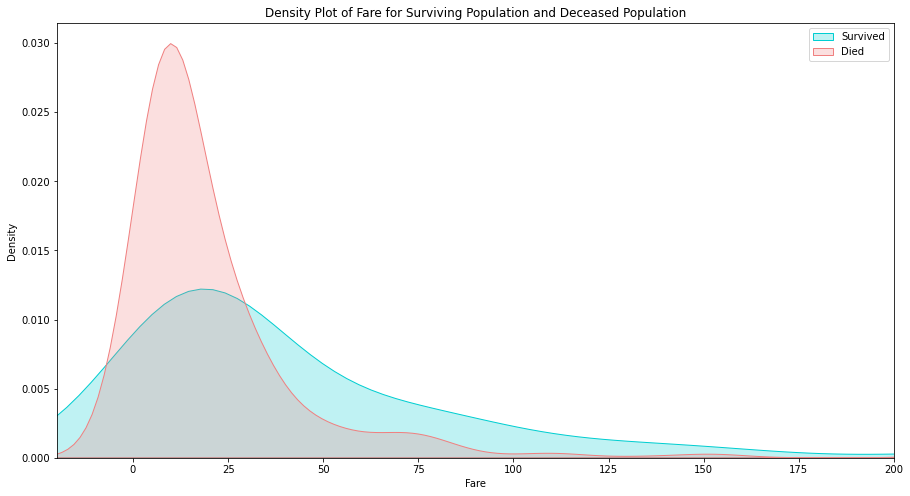

In [29]:
# fare

plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

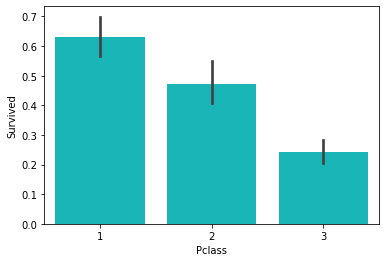

In [31]:
# pclass
sns.barplot(x='Pclass', y='Survived', data=train_df, color="darkturquoise")
plt.show()

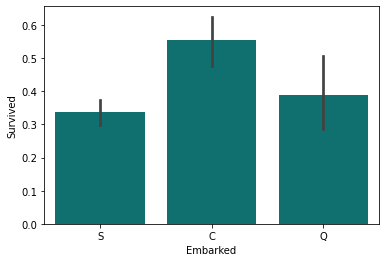

In [33]:
# embarkment port

sns.barplot(x='Embarked', y='Survived', data=train_df, color="teal")
plt.show()

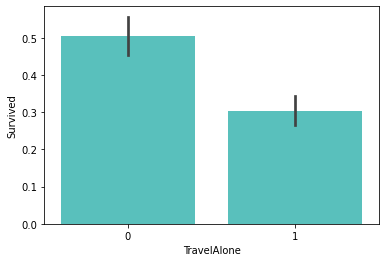

In [34]:
#travelalone
sns.barplot(x='TravelAlone', y='Survived', data=final_train, color="mediumturquoise")
plt.show()

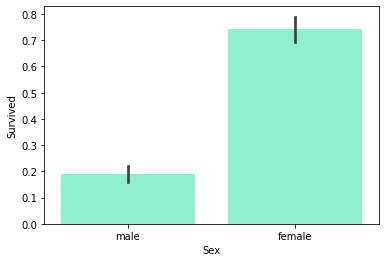

In [36]:
# gender
sns.barplot(x='Sex', y='Survived', data=train_df, color="aquamarine")
plt.show()